In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split,GridSearchCV

# To build linear regression_model
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_excel('FRA Project A CompData-1.xlsx')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,_Total_Asset_Growth_Rate,_Net_Value_Growth_Rate,_Total_Asset_Return_Growth_Rate_Ratio,_Cash_Reinvestment_perc,_Current_Ratio,_Quick_Ratio,_Interest_Expense_Ratio,_Total_debt_to_Total_net_worth,_Long_term_fund_suitability_ratio_A,_Net_profit_before_tax_to_Paid_in_capital,_Total_Asset_Turnover,_Accounts_Receivable_Turnover,_Average_Collection_Days,_Inventory_Turnover_Rate_times,_Fixed_Assets_Turnover_Frequency,_Net_Worth_Turnover_Rate_times,_Operating_profit_per_person,_Allocation_rate_per_person,_Quick_Assets_to_Total_Assets,_Cash_to_Total_Assets,_Quick_Assets_to_Current_Liability,_Cash_to_Current_Liability,_Operating_Funds_to_Liability,_Inventory_to_Working_Capital,_Inventory_to_Current_Liability,_Long_term_Liability_to_Current_Assets,_Retained_Earnings_to_Total_Assets,_Total_income_to_Total_expense,_Total_expense_to_Assets,_Current_Asset_Turnover_Rate,_Quick_Asset_Turnover_Rate,_Cash_Turnover_Rate,_Fixed_Assets_to_Assets,_Cash_Flow_to_Total_Assets,_Cash_Flow_to_Liability,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,0.217590,7.500000e+09,0.000441,0.263902,0.369137,0.008324,0.000255,0.631513,0.026006,0.005767,0.192859,0.053973,0.014004,0.000452,7.070000e+08,3.048690e-04,0.029839,0.611689,0.139494,0.176438,0.025626,0.001509,0.000676,0.342391,0.278434,0.017945,0.003064,0.937630,0.002687,0.007059,0.000732,1.420410e-04,5.470000e+09,0.094270,0.632666,0.458073,0.576869,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,0.839645,0.217360,6.750000e+09,0.000403,0.263714,0.372676,0.006939,0.004787,0.628055,0.006812,0.005230,0.160682,0.056972,0.000306,0.020645,2.782020e-04,8.850000e+09,0.018387,0.386626,0.022805,0.402040,0.004529,0.006584,0.000216,0.337476,0.277221,0.001271,0.004813,0.926251,0.002044,0.015441,0.000301,2.985590e-04,8.820000e+08,0.351895,0.642967,0.459282,0.551523,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,0.848196,0.217573,9.680000e+09,0.000452,0.264095,0.348860,0.008669,0.005912,0.631688,0.004105,0.005139,0.171548,0.154423,0.001045,0.006048,1.698640e-04,1.490300e-04,0.029839,0.393263,0.012358,0.318921,0.008242,0.006090,0.000458,0.306993,0.277473,0.007012,0.000000,0.933155,0.002324,0.009771,0.000127,9.410000e+08,6.790000e+08,0.463276,0.644486,0.459700,0.463045,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,0.848391,0.217662,7.520000e+09,0.000448,0.264766,0.379876,0.017750,0.001738,0.632588,0.007846,0.011960,0.172159,0.101949,0.005411,0.001169,1.340000e+09,1.826942e-03,0.028387,0.439780,0.009049,0.137092,0.053510,0.002437,0.002793,0.343500,0.277630,0.039872,0.004472,0.928037,0.002334,0.013607,0.000401,5.310000e+09,6.020000e+09,0.026433,0.656832,0.461860,0.577212,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,0.847987,0.217589,7.120000e+09,0.000454,0.263966,0.389609,0.008427,0.003967,0.632682,0.013671,0.005822,0.175598,0.163418,0.000814,0.007776,1.341330e-04,8.298780e-04,0.052258,0.392766,0.002069,0.739193,0.08

We shall drop the Co_Code & Co_Name columns unless and otherwise we need it for analysis. 

### Regular EDA.

In [5]:
df.drop(['Co_Code', 'Co_Name'], axis= 1, inplace= True)

In [6]:
df.head(2)

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,_Total_Asset_Growth_Rate,_Net_Value_Growth_Rate,_Total_Asset_Return_Growth_Rate_Ratio,_Cash_Reinvestment_perc,_Current_Ratio,_Quick_Ratio,_Interest_Expense_Ratio,_Total_debt_to_Total_net_worth,_Long_term_fund_suitability_ratio_A,_Net_profit_before_tax_to_Paid_in_capital,_Total_Asset_Turnover,_Accounts_Receivable_Turnover,_Average_Collection_Days,_Inventory_Turnover_Rate_times,_Fixed_Assets_Turnover_Frequency,_Net_Worth_Turnover_Rate_times,_Operating_profit_per_person,_Allocation_rate_per_person,_Quick_Assets_to_Total_Assets,_Cash_to_Total_Assets,_Quick_Assets_to_Current_Liability,_Cash_to_Current_Liability,_Operating_Funds_to_Liability,_Inventory_to_Working_Capital,_Inventory_to_Current_Liability,_Long_term_Liability_to_Current_Assets,_Retained_Earnings_to_Total_Assets,_Total_income_to_Total_expense,_Total_expense_to_Assets,_Current_Asset_Turnover_Rate,_Quick_Asset_Turnover_Rate,_Cash_Turnover_Rate,_Fixed_Assets_to_Assets,_Cash_Flow_to_Total_Assets,_Cash_Flow_to_Liability,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,0.21759,7.500000e+09,0.000441,0.263902,0.369137,0.008324,0.000255,0.631513,0.026006,0.005767,0.192859,0.053973,0.014004,0.000452,7.070000e+08,3.048690e-04,0.029839,0.611689,0.139494,0.176438,0.025626,0.001509,0.000676,0.342391,0.278434,0.017945,0.003064,0.937630,0.002687,0.007059,0.000732,0.000142,5.470000e+09,0.094270,0.632666,0.458073,0.576869,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,0.839645,0.21736,6.750000e+09,0.000403,0.263714,0.372676,0.006939,0.004787,0.628055,0.006812,0.005230,0.160682,0.056972,0.000306,0.020645,2.782020e-04,8.850000e+09,0.018387,0.386626,0.022805,0.402040,0.004529,0.006584,0.000216,0.337476,0.277221,0.001271,0.004813,0.926251,0.002044,0.015441,0.000301,0.000299,8.820000e+08,0.351895,0.642967,0.459282,0.551523,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 56 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   _Operating_Expense_Rate                            2058 non-null   float64
 1   _Research_and_development_expense_rate             2058 non-null   float64
 2   _Cash_flow_rate                                    2058 non-null   float64
 3   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 4   _Tax_rate_A                                        2058 non-null   float64
 5   _Cash_Flow_Per_Share                               1891 non-null   float64
 6   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 7   _Realized_Sales_Gross_Profit_Growth_Rate           2058 non-null   float64
 8   _Operating_Profit_Growth_Rate                      2058 non-null   float64
 9   _Continu

In [8]:
df.shape

(2058, 56)

In [9]:
print(df.isnull().sum().sum())

298


In [10]:
df.isnull().sum()

_Operating_Expense_Rate                                0
_Research_and_development_expense_rate                 0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Tax_rate_A                                            0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                                           0
_Interest_Expense_Ratio                                0
_Total_debt_to_Total_net_worth 

### Missing Value or Null Value Treatment.

The median is the middlemost value. It’s better to use the median value for imputation in the case of outliers.

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
col=list(df)
df = pd.DataFrame(imputer.fit_transform(df))
df.columns=col
df.head()

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,_Total_Asset_Growth_Rate,_Net_Value_Growth_Rate,_Total_Asset_Return_Growth_Rate_Ratio,_Cash_Reinvestment_perc,_Current_Ratio,_Quick_Ratio,_Interest_Expense_Ratio,_Total_debt_to_Total_net_worth,_Long_term_fund_suitability_ratio_A,_Net_profit_before_tax_to_Paid_in_capital,_Total_Asset_Turnover,_Accounts_Receivable_Turnover,_Average_Collection_Days,_Inventory_Turnover_Rate_times,_Fixed_Assets_Turnover_Frequency,_Net_Worth_Turnover_Rate_times,_Operating_profit_per_person,_Allocation_rate_per_person,_Quick_Assets_to_Total_Assets,_Cash_to_Total_Assets,_Quick_Assets_to_Current_Liability,_Cash_to_Current_Liability,_Operating_Funds_to_Liability,_Inventory_to_Working_Capital,_Inventory_to_Current_Liability,_Long_term_Liability_to_Current_Assets,_Retained_Earnings_to_Total_Assets,_Total_income_to_Total_expense,_Total_expense_to_Assets,_Current_Asset_Turnover_Rate,_Quick_Asset_Turnover_Rate,_Cash_Turnover_Rate,_Fixed_Assets_to_Assets,_Cash_Flow_to_Total_Assets,_Cash_Flow_to_Liability,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,0.217590,7.500000e+09,0.000441,0.263902,0.369137,0.008324,0.000255,0.631513,0.026006,0.005767,0.192859,0.053973,0.014004,0.000452,7.070000e+08,3.048690e-04,0.029839,0.611689,0.139494,0.176438,0.025626,0.001509,0.000676,0.342391,0.278434,0.017945,0.003064,0.937630,0.002687,0.007059,0.000732,1.420410e-04,5.470000e+09,0.094270,0.632666,0.458073,0.576869,0.310901,0.034913,0.0,0.028801,0.620927,0.026930,0.565744,1.0,0.015338,0.0
1,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,0.839645,0.217360,6.750000e+09,0.000403,0.263714,0.372676,0.006939,0.004787,0.628055,0.006812,0.005230,0.160682,0.056972,0.000306,0.020645,2.782020e-04,8.850000e+09,0.018387,0.386626,0.022805,0.402040,0.004529,0.006584,0.000216,0.337476,0.277221,0.001271,0.004813,0.926251,0.002044,0.015441,0.000301,2.985590e-04,8.820000e+08,0.351895,0.642967,0.459282,0.551523,0.314572,0.041653,0.0,0.006191,0.622513,0.026297,0.560741,1.0,0.029445,1.0
2,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,0.848196,0.217573,9.680000e+09,0.000452,0.264095,0.348860,0.008669,0.005912,0.631688,0.004105,0.005139,0.171548,0.154423,0.001045,0.006048,1.698640e-04,1.490300e-04,0.029839,0.393263,0.012358,0.318921,0.008242,0.006090,0.000458,0.306993,0.277473,0.007012,0.000000,0.933155,0.002324,0.009771,0.000127,9.410000e+08,6.790000e+08,0.463276,0.644486,0.459700,0.463045,0.314777,0.033560,0.0,0.001095,0.623749,0.027276,0.566744,1.0,0.041718,0.0
3,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,0.848391,0.217662,7.520000e+09,0.000448,0.264766,0.379876,0.017750,0.001738,0.632588,0.007846,0.011960,0.172159,0.101949,0.005411,0.001169,1.340000e+09,1.826942e-03,0.028387,0.439780,0.009049,0.137092,0.053510,0.002437,0.002793,0.343500,0.277630,0.039872,0.004472,0.928037,0.002334,0.013607,0.000401,5.310000e+09,6.020000e+09,0.026433,0.656832,0.461860,0.577212,0.316974,0.016527,0.0,0.003749,0.622963,0.026988,0.565950,1.0,0.026956,0.0
4,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,0.847987,0.217589,7.120000e+09,0.000454,0.263966,0.389609,0.008427,0.003967,0.632682,0.013671,0.005822,0.175598,0.163418,0.000814,0.007776,1.341330e-04,8.298780e-04,0.052258,0.392766,0.002069,0.739193,0.082328,0.007271,0.002376,0.345796,0.277235,0.003342,0.000000,0.934421,0.002310,0.010

In [12]:
print(df.isnull().sum().sum())

0


In [13]:
df.shape

(2058, 56)

In [14]:
df.duplicated().sum()

0

In [15]:
df.describe()

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,_Total_Asset_Growth_Rate,_Net_Value_Growth_Rate,_Total_Asset_Return_Growth_Rate_Ratio,_Cash_Reinvestment_perc,_Current_Ratio,_Quick_Ratio,_Interest_Expense_Ratio,_Total_debt_to_Total_net_worth,_Long_term_fund_suitability_ratio_A,_Net_profit_before_tax_to_Paid_in_capital,_Total_Asset_Turnover,_Accounts_Receivable_Turnover,_Average_Collection_Days,_Inventory_Turnover_Rate_times,_Fixed_Assets_Turnover_Frequency,_Net_Worth_Turnover_Rate_times,_Operating_profit_per_person,_Allocation_rate_per_person,_Quick_Assets_to_Total_Assets,_Cash_to_Total_Assets,_Quick_Assets_to_Current_Liability,_Cash_to_Current_Liability,_Operating_Funds_to_Liability,_Inventory_to_Working_Capital,_Inventory_to_Current_Liability,_Long_term_Liability_to_Current_Assets,_Retained_Earnings_to_Total_Assets,_Total_income_to_Total_expense,_Total_expense_to_Assets,_Current_Asset_Turnover_Rate,_Quick_Asset_Turnover_Rate,_Cash_Turnover_Rate,_Fixed_Assets_to_Assets,_Cash_Flow_to_Total_Assets,_Cash_Flow_to_Liability,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
count,2.058000e+03,2.058000e+03,2058.000000,2.058000e+03,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2.058000e+03,2.058000e+03,2058.000000,2058.000000,2.058000e+03,2.058000e+03,2058.000000,2.058000e+03,2058.000000,2058.000000,2058.000000,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2058.000000,2058.000000,2.058000e+03,2058.000000,2058.000000,2.058000e+03,2.058000e+03,2058.000000,2058.000000,2.058000e+03,2.058000e+03,2058.000000,2058.000000,2058.000000,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2.058000e+03,2058.000000,2058.000000,2058.000000,2058.0,2058.000000,2058.000000
mean,2.052389e+09,1.208634e+09,0.465243,1.113022e+07,0.114777,0.320039,0.176967,0.022761,0.848108,0.217392,5.287663e+09,5.189504e+06,0.264100,0.377197,1.336249e+06,2.775510e+07,0.631291,1.060496e+07,0.008973,0.175399,0.128640,4.159864e+07,2.629786e+07,2.030227e+09,1.230898e+09,0.039577,0.403669,5.725559e+06,0.342198,0.078337,1.190476e+07,9.282507e+07,0.348234,0.277749,5.786346e+07,7.340107e+07,0.930355,0.002358,0.031092,1.273303e+09,2.571768e+09,2.653696e+09,4.042760e+06,0.644232,0.459975,0.579734,0.314629,0.039306,0.003401,2.779397e+07,0.623686,0.027852,0.565435,1.0,0.042529,0.106900
std,3.252624e+09,2.144568e+09,0.022663,9.042595e+07,0.152446,0.014667,0.030157,0.021701,0.004589,0.005679,2.912615e+09,2.077918e+08,0.002416,0.027373,6.061917e+07,4.448654e+08,0.006786,2.683180e+08,0.034852,0.026223,0.100622,5.047673e+08,4.109967e+08,3.077250e+09,2.649289e+09,0.042396,0.053590,1.979500e+08,0.210392,0.096565,3.122923e+08,7.851899e+08,0.038403,0.018444,6.278795e+08,6.693526e+08,0.029761,0.000464,0.038700,2.839741e+09,3.453544e+09,2.821245e+09,1.834006e+08,0.045059,0.032881,0.063751,0.012780,0.047818,0.058236,4.717714e+08,0.011631,0.013839,0.011535,0.0,0.059525,0.309061
min,1.000260e-04,0.000000e+00,0.000000,0.000000e+00,0.000000,0.169449,0.000000,0.004282,0.736430,0.000000,0.000000e+00,0.000000e+00,0.251620,0.025828,0.000000e+00,0.000000e+00,0.525126,0.000000e+00,0.004129,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.008871,0.000000,0.000000e+00,0.000000,0.000184,0.000000e+00,1.008560e-04,0.026274,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000853,0.000000e+00,0.000000e+00,1.000310e-04,0.000000e+00,0.000000,0.032583,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.408682,0.012845,0.17206

### Univariate Analysis

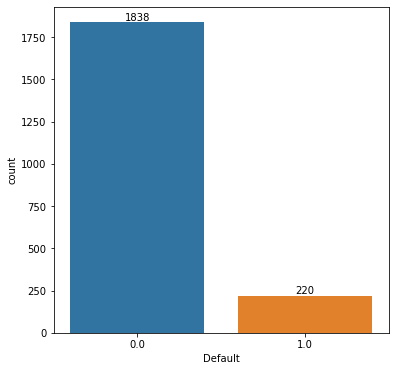

In [16]:
plt.figure(figsize = (6,6))
ax= sns.countplot(x="Default",data=df)
for label in ax.containers:
    ax.bar_label(label)
plt.show();

In [17]:
df['Default'].value_counts()

0.0    1838
1.0     220
Name: Default, dtype: int64

In [18]:
df.Default.sum()/len(df.Default)

0.10689990281827016

### Histplot

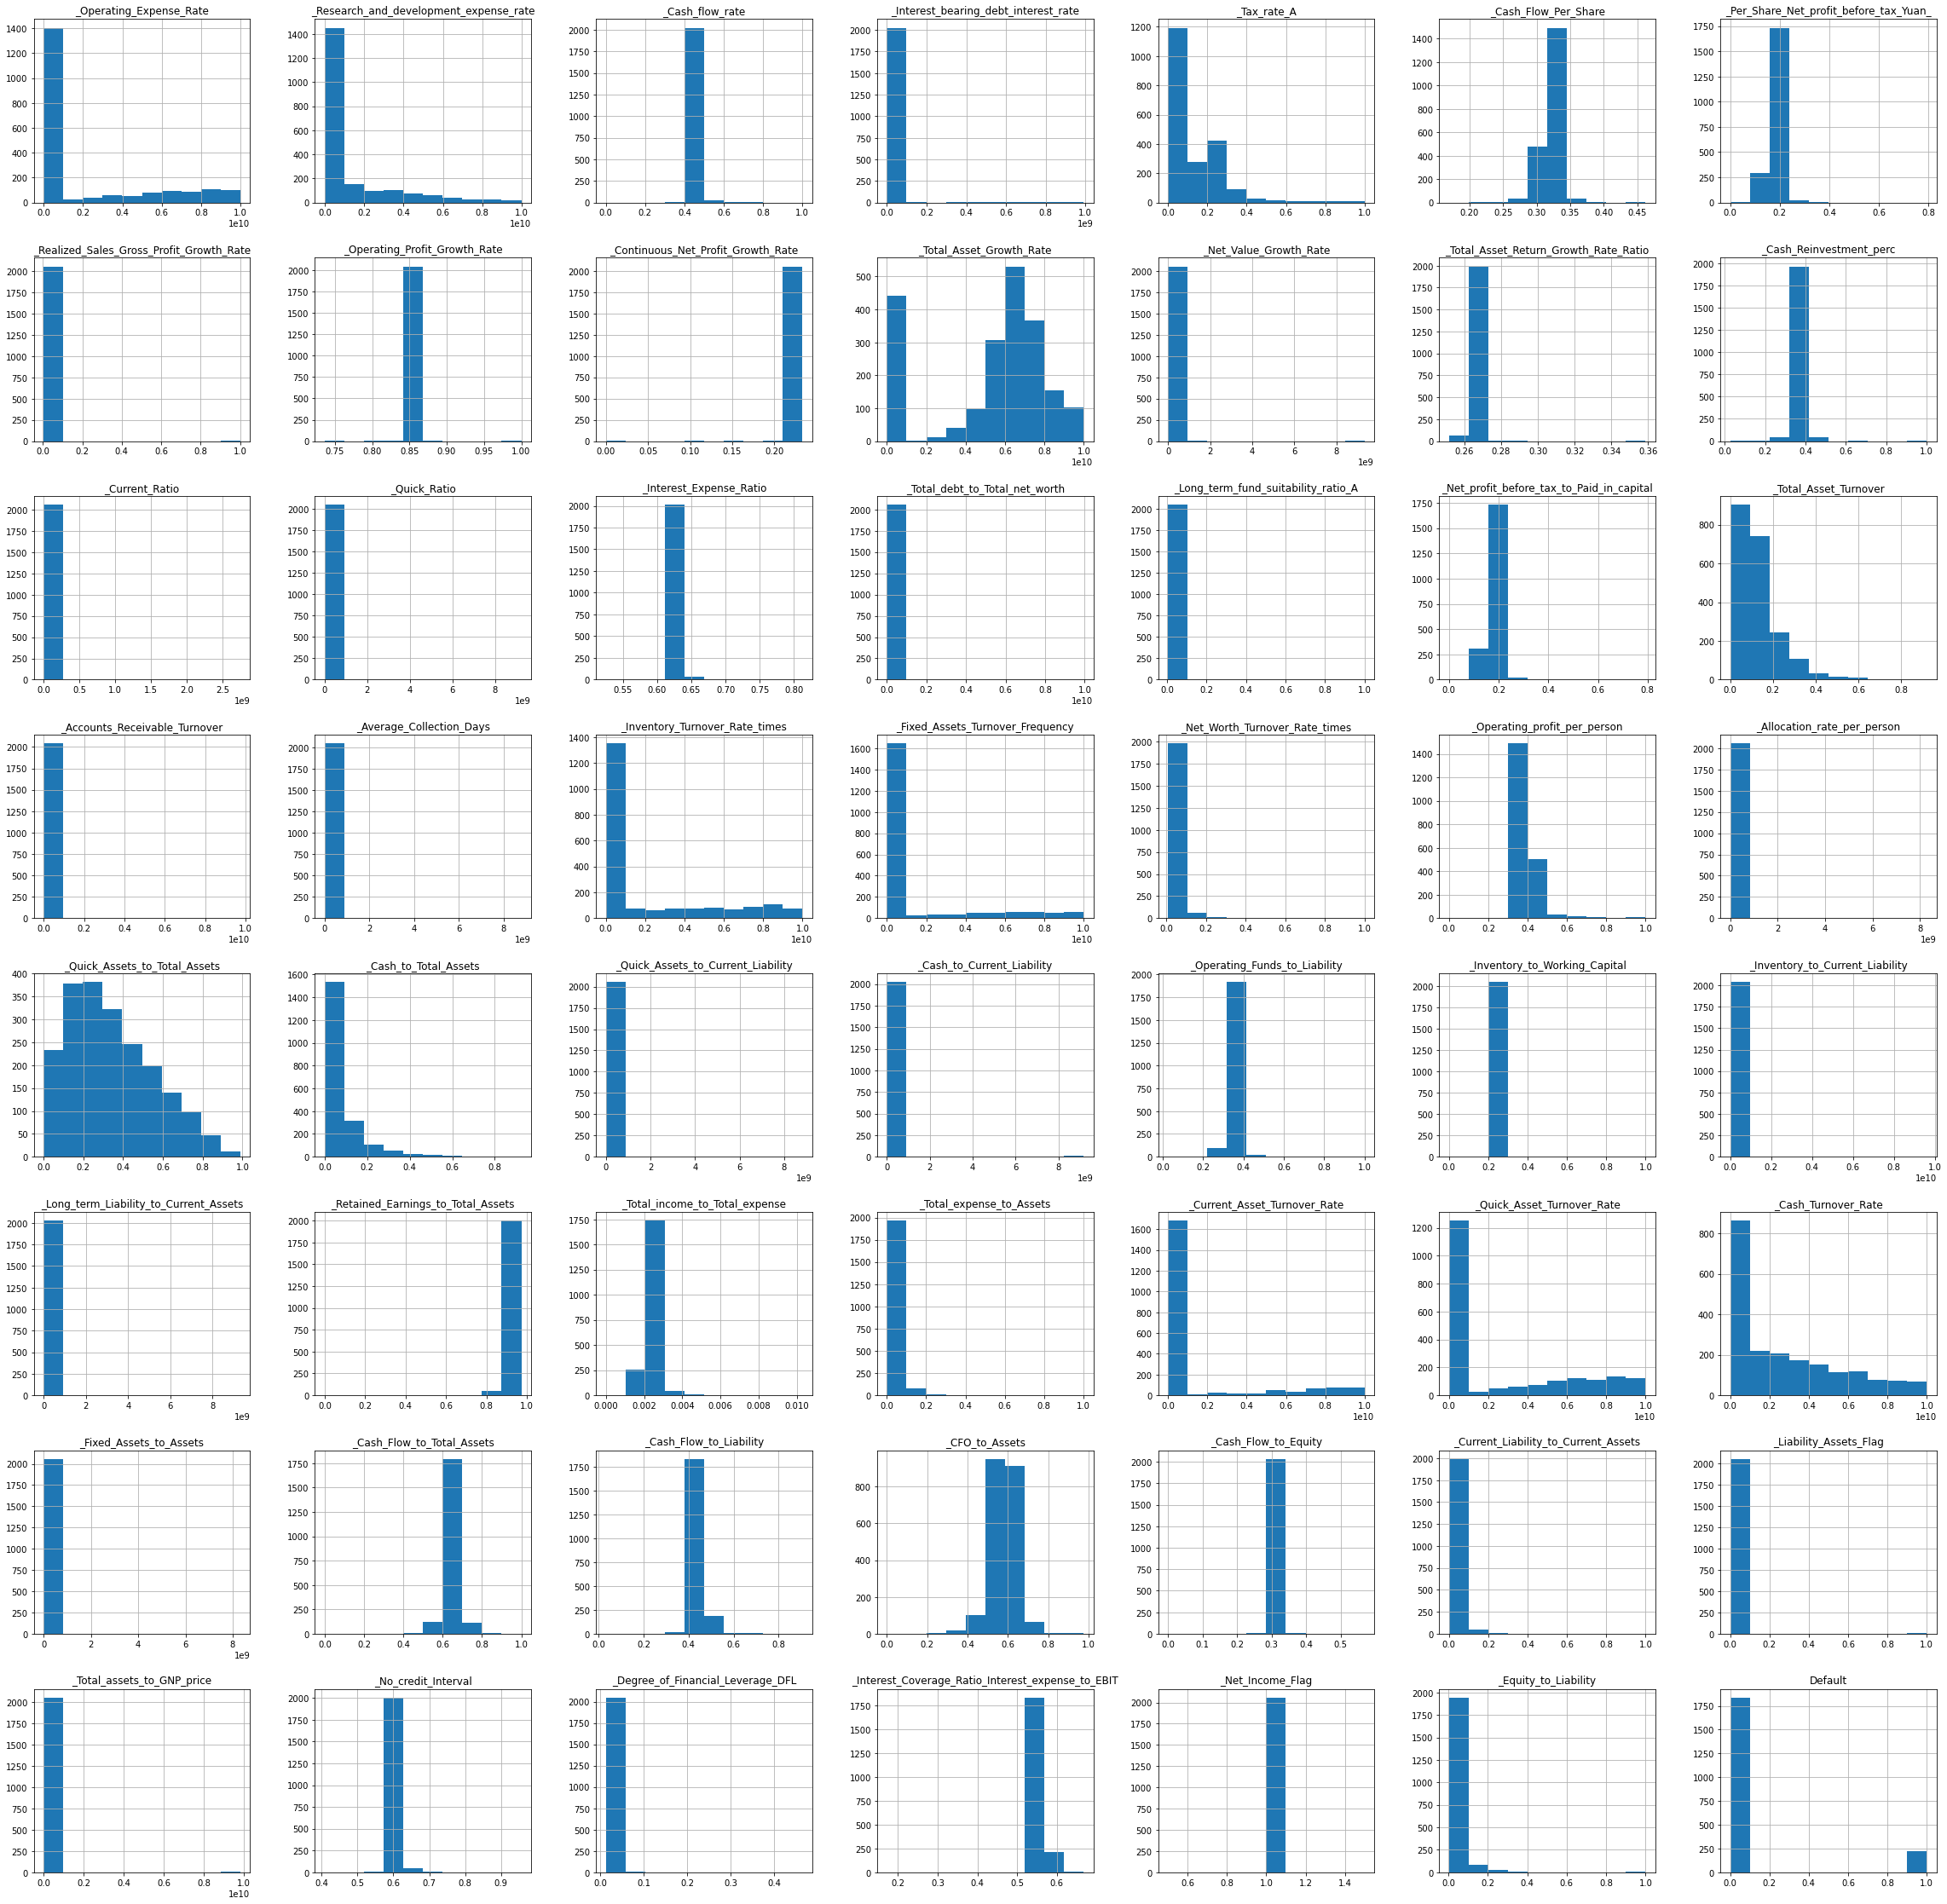

In [19]:
df.hist(figsize=(40,40));

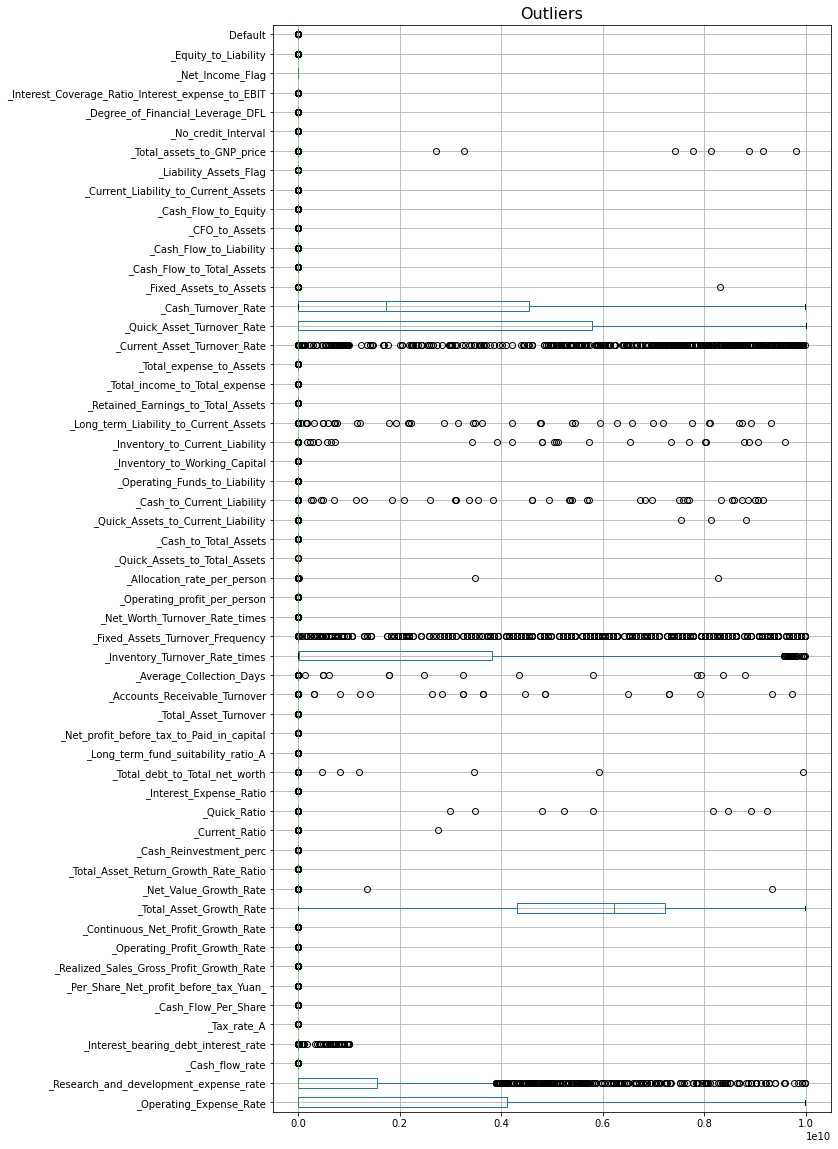

In [20]:
plt.figure(figsize=(10,20))
df.boxplot(vert=0)
plt.title('Outliers',fontsize=16)
plt.show()

### Outlier Treatment

In [21]:
df_X = df.drop('Default', axis=1)
df_Y = df['Default']

In [22]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [23]:
for column in df_X.columns:
    lower_range,upper_range = remove_outlier(df_X[column])
    df_X[column]= np.where(df_X[column]>upper_range, upper_range ,df_X[column])
    df_X[column]= np.where(df_X[column]<lower_range, lower_range ,df_X[column])

In [24]:
df = pd.concat([df_X, df_Y], axis = 1)

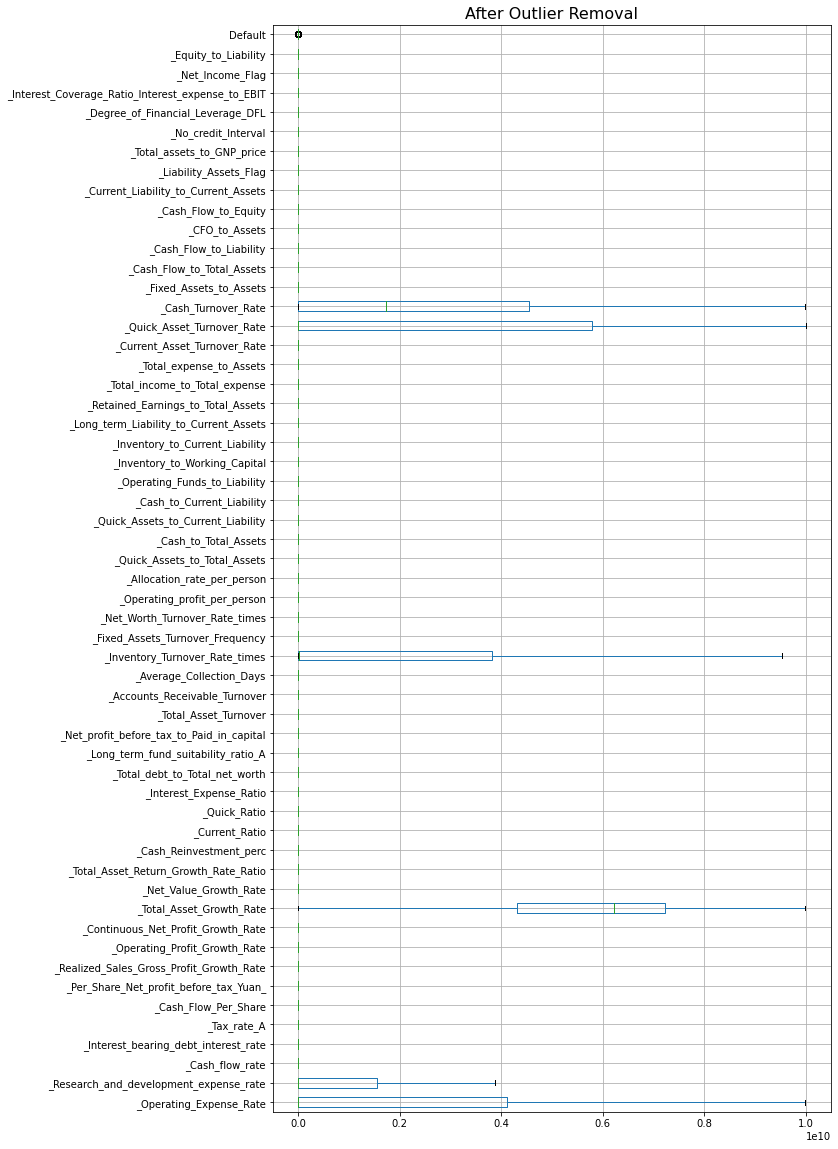

In [25]:
plt.figure(figsize=(10,20))
df.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

### Multivariate Analysis

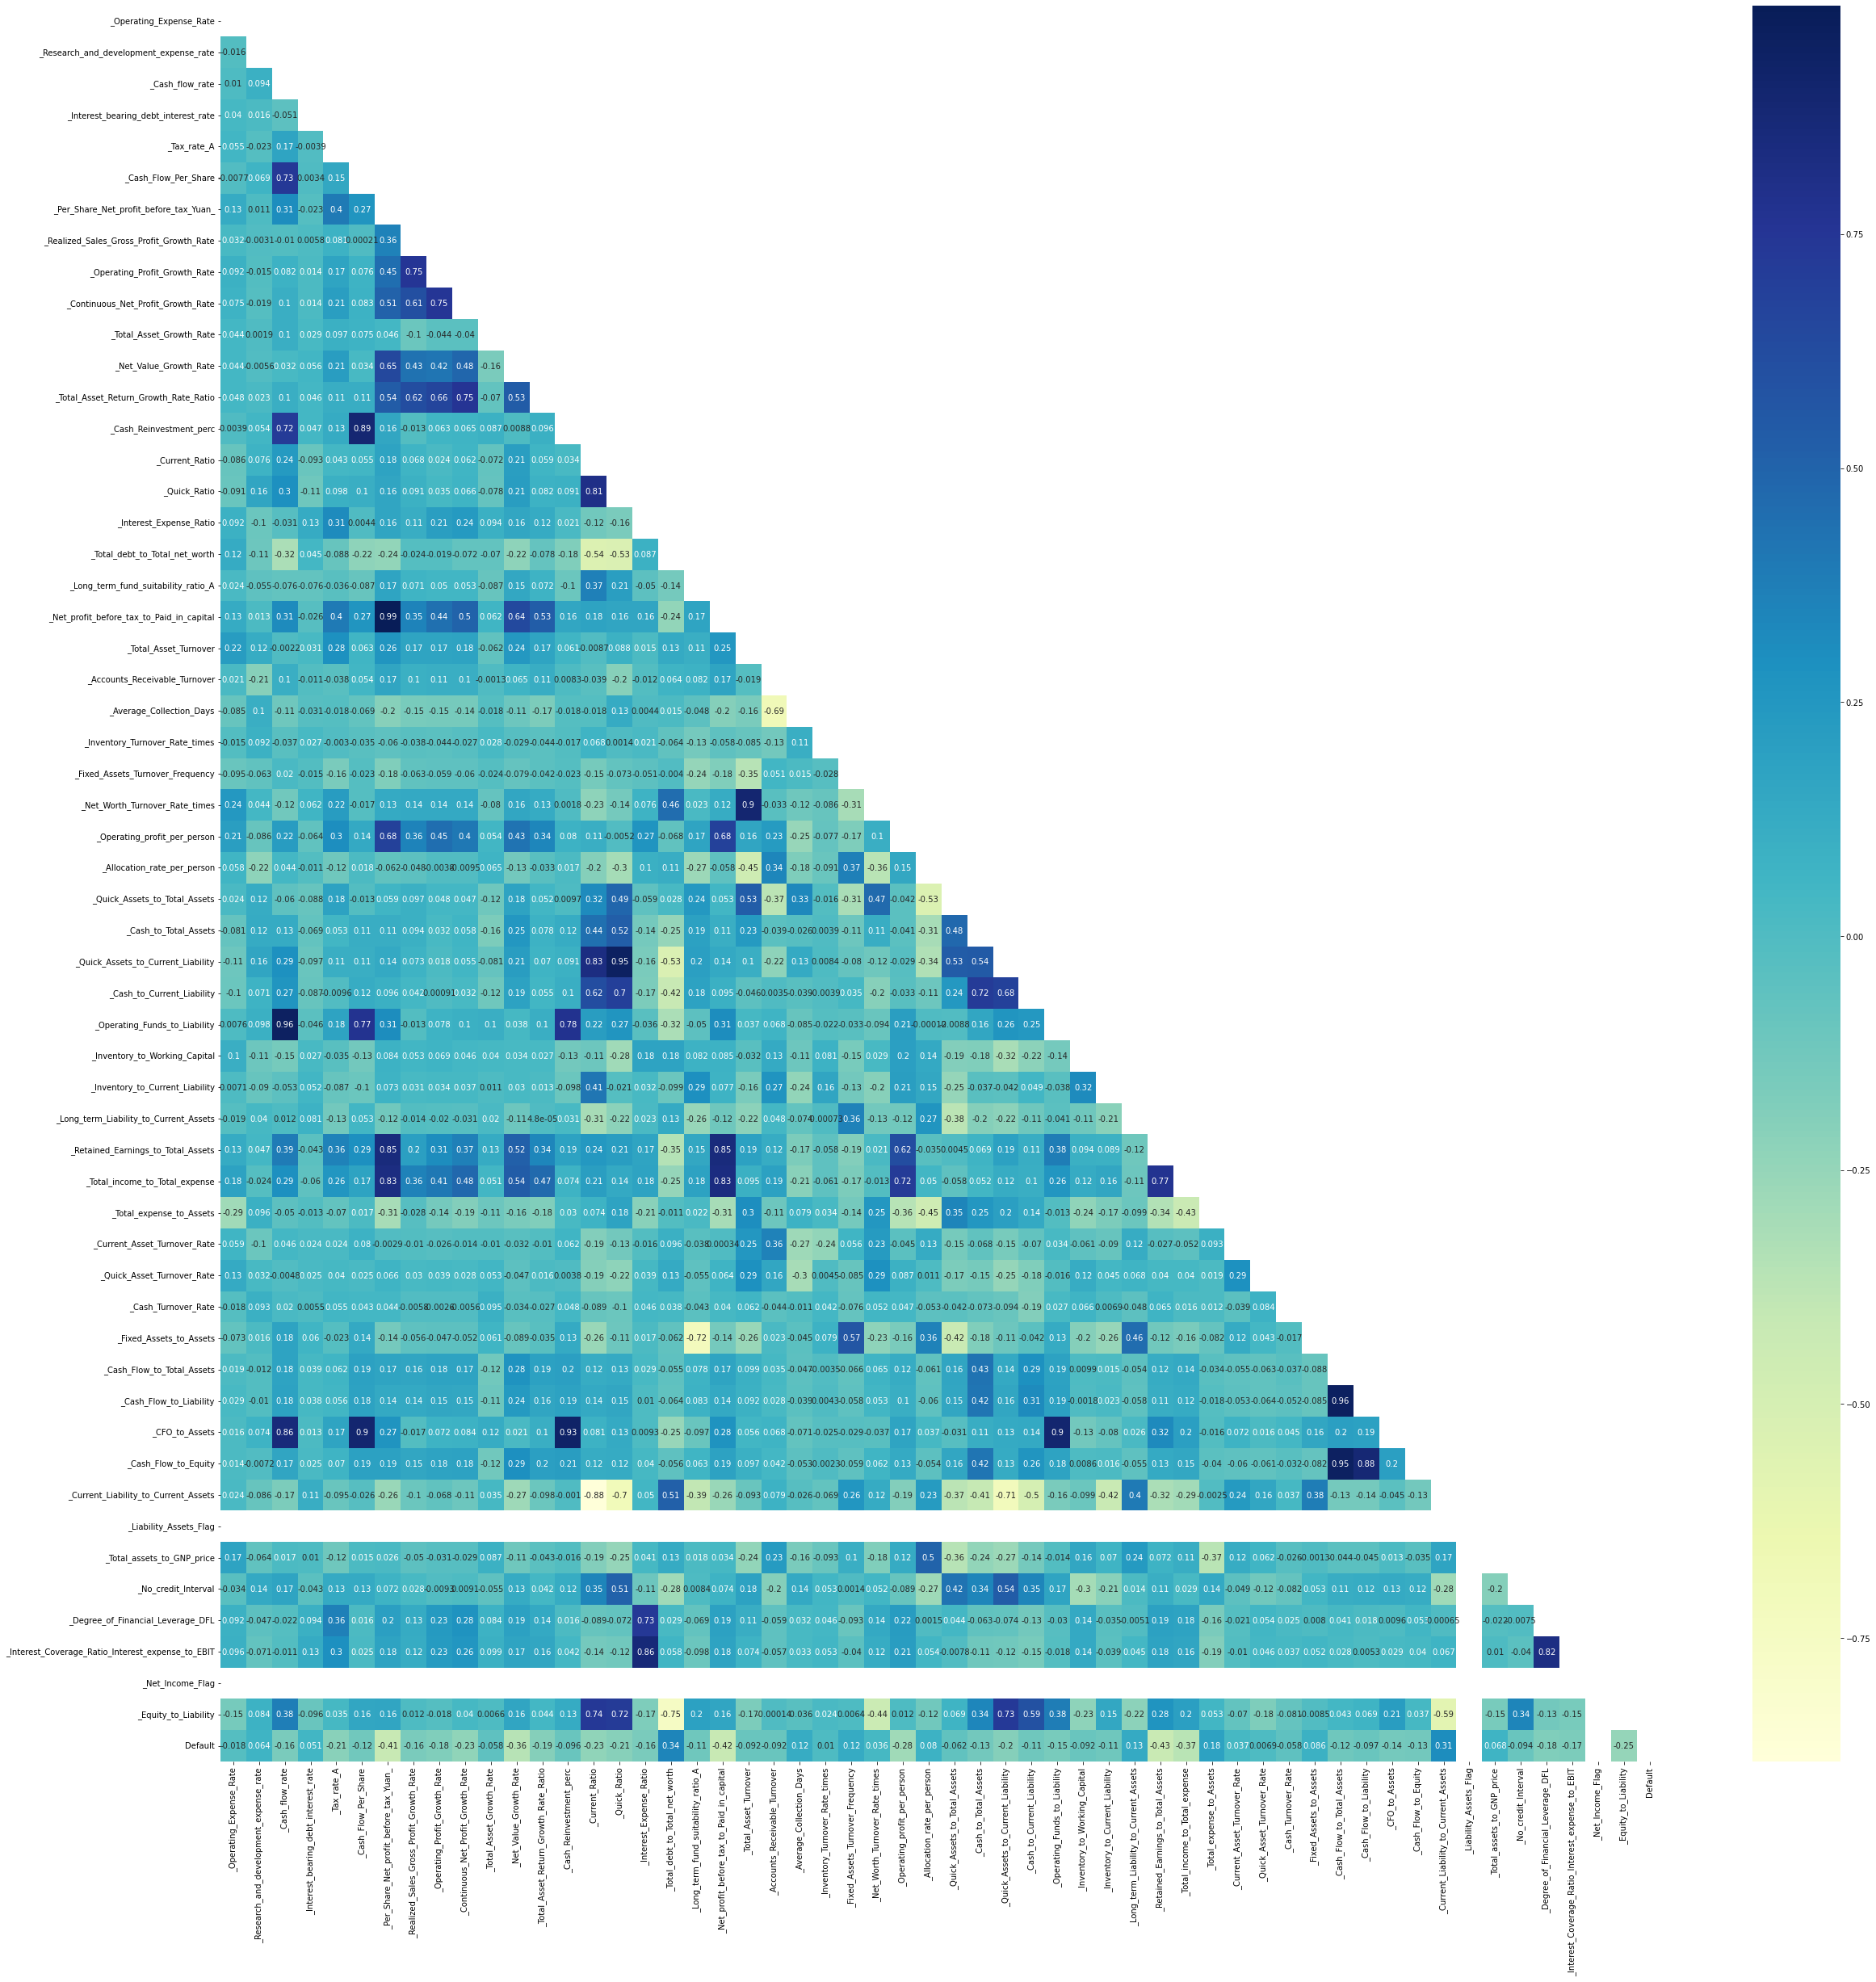

In [117]:
plt.figure(figsize = (40,40))
mask = np.triu(np.ones_like(df.corr()))
dfplot = sns.heatmap((df.corr()), cmap="YlGnBu", annot=True, mask=mask)
plt.show()

### We will continue to make colored scatter plot between significant variables only, post Logistic Regression Model making. 

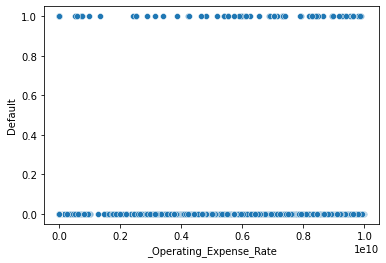

In [118]:
sns.scatterplot(df["_Total_expense_to_Assets"], df["_Accounts_Receivable_Turnover"])
plt.show();

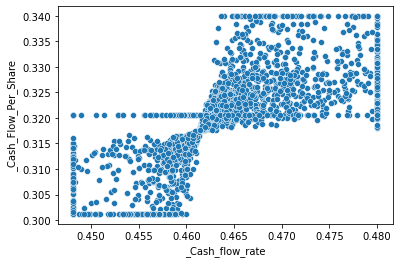

In [119]:
sns.scatterplot(df["_Allocation_rate_per_person"], df["_Operating_Profit_per_person"])
plt.show();

### Model 1: Logit regression using Statsmodel & VIF

In [148]:
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE #Very important
from sklearn.linear_model import LogisticRegression

### Let us check significance of variables before proceeding to model development.

model = SM.logit(formula=’Dependent Variable ~ Σ𝐼𝑛𝑑𝑒𝑝𝑒𝑛𝑑𝑒𝑛𝑡 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 (𝑘)’ data = ‘Data Frame containing the required values’).fit()

Creating logistic regression equation & storing it in f1.
Splitting arrays or matrices into random train and test subsets. Model will be fitted on train set and predictions will be made on the test set.

In [149]:
X = df.drop(['Default'], axis=1)
y = df['Default']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42,stratify= df['Default'])

df_train = pd.concat([X_train,y_train], axis=1)
df_test = pd.concat([X_test,y_test], axis=1)

In [151]:
df_train.columns

Index(['_Operating_Expense_Rate', '_Research_and_development_expense_rate',
       '_Cash_flow_rate', '_Interest_bearing_debt_interest_rate',
       '_Tax_rate_A', '_Cash_Flow_Per_Share',
       '_Per_Share_Net_profit_before_tax_Yuan_',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
       '_Current_Ratio', '_Quick_Ratio', '_Interest_Expense_Ratio',
       '_Total_debt_to_Total_net_worth', '_Long_term_fund_suitability_ratio_A',
       '_Net_profit_before_tax_to_Paid_in_capital', '_Total_Asset_Turnover',
       '_Accounts_Receivable_Turnover', '_Average_Collection_Days',
       '_Inventory_Turnover_Rate_times', '_Fixed_Assets_Turnover_Frequency',
       '_Net_Worth_Turnover_Rate_times', '_Operating_profit_per_person',
       '_Allocation_rate_per_person', '_Quick_Assets_to

Model 1
Before starting model building, lets look at the problem of multicollinearity. Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

In [152]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [153]:
calc_vif(X_train).sort_values(by='VIF', ascending = True)

,variables,VIF
53,_Net_Income_Flag,0.000000
41,_Cash_Turnover_Rate,1.127389
3,_Interest_bearing_debt_interest_rate,1.140579
10,_Total_Asset_Growth_Rate,1.212307
1,_Research_and_development_expense_rate,1.220084
23,_Inventory_Turnover_Rate_times,1.243086
0,_Operating_Expense_Rate,1.375777
40,_Quick_Asset_Turnover_Rate,1.431774
4,_Tax_rate_A,1.652764
39,_Current_Asset_Turnover_Rate,1.661499


Here, we see that the value of VIF is high for many variables. Here, we may drop variables with VIF more than 5 (very high correlation) & build our model using variables whose VIF is less than 5.

In [256]:
f1 ='Default ~ _Fixed_Assets_Turnover_Frequency + _Total_expense_to_Assets + _Average_Collection_Days + _Long_term_fund_suitability_ratio_A + _Realized_Sales_Gross_Profit_Growth_Rate+ _Accounts_Receivable_Turnover+ _Allocation_rate_per_person + _Operating_profit_per_person +_Inventory_to_Current_Liability+ _Total_Asset_Return_Growth_Rate_Ratio + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Degree_of_Financial_Leverage_DFL+ _Interest_Expense_Ratio + _Interest_bearing_debt_interest_rate + _Total_Asset_Growth_Rate + _Research_and_development_expense_rate+ _Long_term_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _Inventory_to_Working_Capital+ _No_credit_Interval + _Current_Asset_Turnover_Rate + _Tax_rate_A +_Quick_Asset_Turnover_Rate + _Operating_Expense_Rate + _Inventory_Turnover_Rate_times + _Cash_Turnover_Rate' 

In [279]:
f2 = 'Default~ _Net_Value_Growth_Rate + _Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate'

In [259]:
f1_model_1 = sm.logit(formula = f1 , data= df).fit()

Optimization terminated successfully.
         Current function value: 0.240784
         Iterations 20


In [260]:
f1_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2058
Model:                          Logit   Df Residuals:                     2030
Method:                           MLE   Df Model:                           27
Date:                Sat, 22 Jul 2023   Pseudo R-squ.:                  0.2918
Time:                        19:16:55   Log-Likelihood:                -495.53
converged:                       True   LL-Null:                       -699.69
Covariance Type:            nonrobust   LLR p-value:                 1.012e-69
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  361.1792    101.556      3.556      0.000     162.133     560.226
_Fixed_Assets_Turnover_Frequency            12.1628     11.112      1.095      0.274      -9.617      33.943
_Total_expense_to_Assets                    40.8276      5.975      6.833      0.000      29.117      52.538
_Average_Collection_Days                    30.6689     30.083      1.019      0.308     -28.293      89.631
_Long_term_fund_suitability_ratio_A        -66.8040    103.726     -0.644      0.520    -270.104     136.496
_Realized_Sales_Gross_Profit_Growth_Rate  -816.0782   1021.153     -0.799      0.424   -2817.501    1185.345
_Accounts_Receivable_Turnover             -295.3901    136.118     -2.170      0.030    -562.176     -28.605
_Allocation_rate_per_person                 28.5448      7.818      3.651      0.000      13.222      43.868
_Operating_profit_per_person               -49.2667     12.574     -3.918      0.000     -73.912     -24.622
_Inventory_to_Current_Liability            -28.4417     15.496     -1.835      0.066     -58.814       1.930
_Total_Asset_Return_Growth_Rate_Ratio     -207.8970    176.121     -1.180      0.238    -553.088     137.294
_Cash_to_Total_Assets                       -5.1792      2.398     -2.160      0.031      -9.880      -0.479
_Cash_to_Current_Liability                 -46.8494     23.971     -1.954      0.051     -93.832       0.133
_Degree_of_Financial_Leverage_DFL         -387.2466    387.311     -1.000      0.317   -1146.363     371.869
_Interest_Expense_Ratio                    -31.2767     87.029     -0.359      0.719    -201.851     139.297
_Interest_bearing_debt_interest_rate       646.7056    321.183      2.014      0.044      17.198    1276.214
_Total_Asset_Growth_Rate                 -4.525e-11   3.32e-11     -1.362      0.173    -1.1e-10    1.99e-11
_Research_and_development_expense_rate    1.736e-10   5.79e-11      2.996      0.003    6.01e-11    2.87e-10
_Long_term_Liability_to_Current_Assets      10.5792     10.178      1.039      0.299      -9.368      30.527
_Total_assets_to_GNP_price                  34.7155     19.131      1.815      0.070      -2.781      72.212
_Inventory_to_Working_Capital              -44.4156    122.044     -0.364      0.716    -283.618     194.786
_No_credit_Interval                       -368.0532    120.585     -3.052      0.002    -604.395    -131.711
_Current_Asset_Turnover_Rate               -45.1599     83.487     -0.541      0.589    -208.791     118.471
_Tax_rate_A                                 -2.9690      1.046     -2.839      0.005      -5.019      -0.919
_Quick_Asset_Turnover_Rate                2.284e-11   2.73e-11      0.837      0.403   -3.07e-11    7.63e-11
_Operating_Expense_Rate                   6.125e-11   2.81e-11      2.181      0.029    6.22e-12    1.16e-10
_Inventory_Turnover_Rate_times            1.922e-11   2.95e-11      0.652      0

In [280]:
f2_model_1 = sm.logit(formula = f2 , data= df).fit()

         Current function value: inf
         Iterations: 35


In [281]:
f2_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2058
Model:                          Logit   Df Residuals:                     2054
Method:                           MLE   Df Model:                            3
Date:                Sat, 22 Jul 2023   Pseudo R-squ.:                    -inf
Time:                        19:45:38   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                       -699.69
Covariance Type:            nonrobust   LLR p-value:                     1.000
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           2.449e+06    1.5e+07      0.164      0.870   -2.69e+07    3.18e+07
_Net_Value_Growth_Rate             -4.664e+05   3.53e+06     -0.132      0.895   -7.39e+06    6.46e+06
_Operating_Profit_Growth_Rate      -2.783e+06   1.72e+07     -0.162      0.871   -3.65e+07    3.09e+07
_Continuous_Net_Profit_Growth_Rate -4.062e+05      2e+06     -0.203      0.839   -4.33e+06    3.51e+06
======================================================================================================

Possibly complete quasi-separation: A fraction 0.85 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

As the variables + '_Net_Value_Growth_Rate , _Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate' are having high correlations with the dependent variable they are not converging and it is difficult to obtain Psuedo R- squared and adjusted r squared values. Therefore we shall drop them in further model building.

In [261]:
print('The adjusted pseudo R-square value is',1 - ((f1_model_1.llf - f1_model_1.df_model)/f1_model_1.llnull))

The adjusted pseudo R-square value is 0.25319151981351573


In f1_Model_1, 12 variables seem significant and others seem insignificant as their p-values seem higher than 0.05. Lets try & remove variables whose p value is greater than 0.05 & rebuild our model.

In [287]:
f3 = 'Default ~ _Total_expense_to_Assets + _Accounts_Receivable_Turnover + _Allocation_rate_per_person + _Operating_profit_per_person + _Cash_to_Total_Assets + _Interest_bearing_debt_interest_rate+ _Research_and_development_expense_rate + _No_credit_Interval + _Tax_rate_A + _Operating_Expense_Rate + _Cash_Turnover_Rate'

In [288]:
f3_model_2= sm.logit(formula = f3 , data= df_train ).fit()

Optimization terminated successfully.
         Current function value: 0.241982
         Iterations 10


In [289]:
f3_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1366
Method:                           MLE   Df Model:                           11
Date:                Sat, 22 Jul 2023   Pseudo R-squ.:                  0.2873
Time:                        20:06:15   Log-Likelihood:                -333.45
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 3.219e-51
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                281.7023     89.678      3.141      0.002     105.937     457.468
_Total_expense_to_Assets                  43.6173      6.633      6.576      0.000      30.618      56.617
_Accounts_Receivable_Turnover           -498.8172    124.583     -4.004      0.000    -742.995    -254.639
_Allocation_rate_per_person               37.8747      7.823      4.841      0.000      22.541      53.208
_Operating_profit_per_person             -64.8957     13.860     -4.682      0.000     -92.060     -37.731
_Cash_to_Total_Assets                    -10.2193      2.246     -4.550      0.000     -14.621      -5.818
_Interest_bearing_debt_interest_rate     793.9455    366.713      2.165      0.030      75.202    1512.689
_Research_and_development_expense_rate  2.527e-10   6.62e-11      3.819      0.000    1.23e-10    3.82e-10
_No_credit_Interval                     -416.1260    143.490     -2.900      0.004    -697.362    -134.890
_Tax_rate_A                               -4.5549      1.319     -3.454      0.001      -7.139      -1.970
_Operating_Expense_Rate                 5.602e-11   3.24e-11      1.728      0.084   -7.52e-12     1.2e-10
_Cash_Turnover_Rate                    -8.246e-11   4.19e-11     -1.969      0.049   -1.65e-10   -3.61e-13
==========================================================================================================
"""

_Operating Expense Rate_ seems to have an increased p value, so we will drop it and check the model again.

In [302]:
f4 = 'Default ~ _Total_expense_to_Assets + _Accounts_Receivable_Turnover + _Allocation_rate_per_person + _Operating_profit_per_person + _Cash_to_Total_Assets + _Interest_bearing_debt_interest_rate+ _Research_and_development_expense_rate + _No_credit_Interval + _Tax_rate_A + _Cash_Turnover_Rate'

In [303]:
f4_model_2= sm.logit(formula = f4 , data= df_train ).fit()

Optimization terminated successfully.
         Current function value: 0.243039
         Iterations 10


In [305]:
f4_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1367
Method:                           MLE   Df Model:                           10
Date:                Sat, 22 Jul 2023   Pseudo R-squ.:                  0.2841
Time:                        20:45:46   Log-Likelihood:                -334.91
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 2.476e-51
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                276.6384     89.668      3.085      0.002     100.892     452.385
_Total_expense_to_Assets                  41.1053      6.421      6.401      0.000      28.519      53.691
_Accounts_Receivable_Turnover           -491.6837    123.504     -3.981      0.000    -733.746    -249.621
_Allocation_rate_per_person               36.3565      7.756      4.687      0.000      21.155      51.558
_Operating_profit_per_person             -62.2007     13.680     -4.547      0.000     -89.014     -35.388
_Cash_to_Total_Assets                    -10.4268      2.237     -4.661      0.000     -14.811      -6.042
_Interest_bearing_debt_interest_rate     800.2924    364.030      2.198      0.028      86.806    1513.779
_Research_and_development_expense_rate  2.568e-10   6.56e-11      3.915      0.000    1.28e-10    3.85e-10
_No_credit_Interval                     -409.3378    143.470     -2.853      0.004    -690.534    -128.141
_Tax_rate_A                               -4.7151      1.321     -3.569      0.000      -7.304      -2.126
_Cash_Turnover_Rate                    -8.673e-11   4.15e-11     -2.092      0.036   -1.68e-10   -5.47e-12
==========================================================================================================
"""

In [306]:
print('The adjusted pseudo R-square value is',1 - ((f4_model_2.llf - f4_model_2.df_model)/f4_model_2.llnull))

The adjusted pseudo R-square value is 0.26277351315409336


optimum variabes: _Total_expense_to_Assets + _Accounts_Receivable_Turnover + _Allocation_rate_per_person + _Operating_profit_per_person + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Interest_bearing_debt_interest_rate+ _Research_and_development_expense_rate + _No_credit_interval + _Tax_rate_A  + _Cash_Turnover_Rate 

We see that adjusted R sq is now close to Rsq, thus suggesting lesser insignificant variables in the model.

We also notice that current model has no insignificant variables and can be used for prediction purposes.

Lets test the prediction of this model on train and test dataset.

## Prediction on the Data

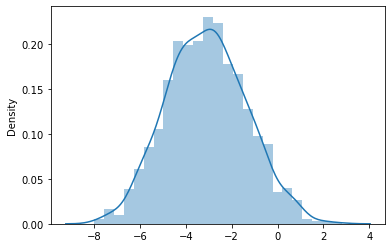

In [307]:
sns.distplot(f4_model_2.fittedvalues);

Now, let us see the predicted probability values:

Prediction on Train set

In [309]:
y_predict_train = f4_model_2.predict(X_train)
y_predict_train

2011    0.275307
697     0.007721
160     0.122812
1273    0.074524
541     0.271734
          ...   
1386    0.005101
1127    0.039782
950     0.046093
1058    0.025719
562     0.170545
Length: 1378, dtype: float64

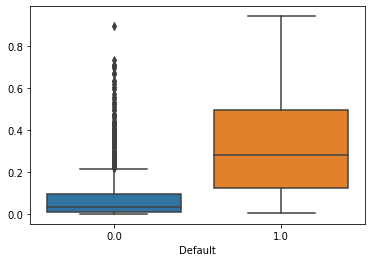

In [310]:
sns.boxplot(x=df['Default'],y=y_predict_train)
plt.xlabel('Default');

From the above boxplot, we need to decide on one such value of a cut-off which will give us the most reasonable descriptive power of the model. Let us find out the most optimal threshold and check.

Let us now see the predicted classes

Choosing the optimal Threshold

In [314]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(df_train['Default'],y_predict_train)

In [315]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.080438823046187

In [316]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.08:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [317]:
from sklearn import metrics

Text(33.0, 0.5, 'Actuals')

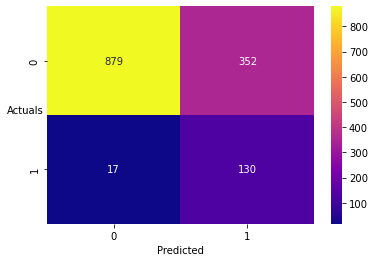

In [318]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0)

In [319]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 879 
False Positives: 352 
False Negatives: 17 
True Positives: 130


In [321]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.981     0.714     0.827      1231
         1.0      0.270     0.884     0.413       147

    accuracy                          0.732      1378
   macro avg      0.625     0.799     0.620      1378
weighted avg      0.905     0.732     0.782      1378



As observed above, accuracy of the model i.e. %overall correct predictions is 71.4%
Sensitivity of the model is 88% i.e. 88% of those defaulted were correctly identified as defaulters by the model.

Prediction on Test set

In [322]:
y_predict_test = f4_model_2.predict(X_test)
y_predict_test

974     0.004496
134     0.017904
1267    0.028867
464     0.018118
579     0.002991
          ...   
1792    0.099840
443     0.425923
621     0.005050
518     0.013743
2057    0.176825
Length: 680, dtype: float64

In [323]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.08:
        a=1
    else:
        a=0
    y_class_pred.append(a)

Checking the accuracy of the model using confusion matrix for test set

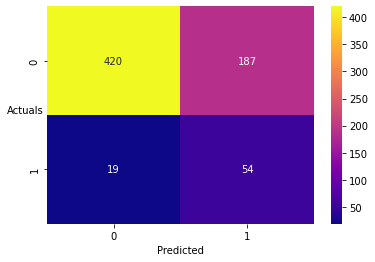

In [324]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [325]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 420 
False Positives: 187 
False Negatives: 19 
True Positives: 54


In [326]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.957     0.692     0.803       607
         1.0      0.224     0.740     0.344        73

    accuracy                          0.697       680
   macro avg      0.590     0.716     0.574       680
weighted avg      0.878     0.697     0.754       680



As observed above, accuracy of the model i.e. %overall correct predictions is 69%
Sensitivity of the model is 74% i.e. 74% of those defaulted were correctly identified as defaulters by the model.

We may choose cutoff of 0.08 as it gave higher model sensitivity & overall accuracy of the model in test dataset.

## Model 2: Random Forest Model

In [327]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [328]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [329]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 50}

In [330]:
best_grid = grid_search.best_estimator_

In [331]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

In [332]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1231
         1.0       0.91      0.58      0.71       147

    accuracy                           0.95      1378
   macro avg       0.93      0.79      0.84      1378
weighted avg       0.95      0.95      0.94      1378



In [334]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       607
         1.0       0.67      0.40      0.50        73

    accuracy                           0.91       680
   macro avg       0.80      0.69      0.73       680
weighted avg       0.90      0.91      0.90       680



## Model 3: LDA Model

In [335]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [336]:
LDA = LinearDiscriminantAnalysis()

In [337]:
lda_model = LDA.fit(X_train, y_train)

In [338]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [339]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      1231
         1.0       0.61      0.56      0.59       147

    accuracy                           0.92      1378
   macro avg       0.78      0.76      0.77      1378
weighted avg       0.91      0.92      0.91      1378



In [340]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       607
         1.0       0.57      0.53      0.55        73

    accuracy                           0.91       680
   macro avg       0.76      0.74      0.75       680
weighted avg       0.90      0.91      0.91       680



In [341]:
pred_train_lda_prob = lda_model.predict_proba(X_train)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [342]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [343]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.05372256767239265

In [344]:
y_class_pred=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.05:
        a=1
    else:
        a=0
    y_class_pred.append(a)

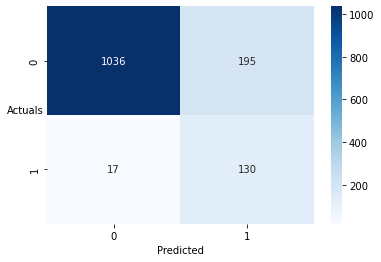

In [345]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [346]:
print(metrics.classification_report(y_train, y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.984     0.842     0.907      1231
         1.0      0.400     0.884     0.551       147

    accuracy                          0.846      1378
   macro avg      0.692     0.863     0.729      1378
weighted avg      0.922     0.846     0.869      1378



In [348]:
y_class_pred=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.05:
        a=1
    else:
        a=0
    y_class_pred.append(a)

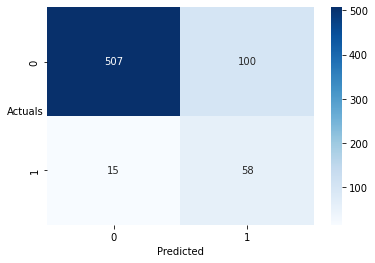

In [349]:
sns.heatmap((metrics.confusion_matrix(y_test, y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [350]:
print(metrics.classification_report(y_test, y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.971     0.835     0.898       607
         1.0      0.367     0.795     0.502        73

    accuracy                          0.831       680
   macro avg      0.669     0.815     0.700       680
weighted avg      0.906     0.831     0.856       680



### Comparing the performances of Models- Log Reg, Random Forest Classifier and LDA-- comparing metrics

creating a dataframe of metrices and concatenating the train and test data sets for comparison and creating ROC curve.